In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# list of LGAs and PHN codes
NWM_LGA = [21180, 21890, 23110, 23270, '24130a', 24330, 24600, 24650,
           25060, '25150a', 25250, 27260, 27350, 'PHN201']

In [3]:
# color parameters for plots
NWM_colour = 'cyan'
VIC_colour = 'blue'
AUS_colour = 'teal'

In [4]:
mother_child_raw = pd.read_excel('Data/mother_child_data.xlsx')

MC_col = ['LGA_name', '% low birthweight babies','% smoking during pregnancy', '% Women who did not attend antenatal care within the first 10 weeks']

MC_data = mother_child_raw.filter(items= MC_col)
MC_data = MC_data.rename(columns={'% Women who did not attend antenatal care within the first 10 weeks':'% non-attendance of antenatal care'})

MC_data

,LGA_name,% low birthweight babies,% smoking during pregnancy,% non-attendance of antenatal care
0,Central and Eastern Sydney,6.257795,2.93866,49.755995
1,Botany Bay (C),7.139316,3.757515,65.681363
2,Burwood (A),7.449088,1.779194,33.730035
3,Canada Bay (A),6.219767,1.511072,41.600074
4,Canterbury-Bankstown (A) - part a,6.958539,5.423377,45.366723
...,...,...,...,...
667,Northern Territory,9.034942,19.641068,37.228715
668,Greater Darwin,7.231588,10.812017,29.759072
669,Rest of Northern Territory,10.950453,31.031823,46.615236
670,NaN,NaN,NaN,NaN


I want to look at low birth weight (LBW) and especially it's risk factors, namely smoking during pregnancy and non-attendance of antenatal care 

In [5]:
MC_rates = MC_data[MC_data['LGA_name'].isin(['North Western Melbourne', 'Victoria', 'AUSTRALIA+'])]
MC_rates = MC_rates.drop([604]) #remove NWM duplicate
MC_rates = MC_rates.rename(columns= {'LGA_name' : 'Percentage'})
MC_rates = MC_rates.T #transpose axis for graphing
MC_rates.columns = MC_rates.iloc[0] #set column titles
MC_rates = MC_rates[1:] #remove duplicate row

MC_rates

Percentage,North Western Melbourne,AUSTRALIA+,Victoria
% low birthweight babies,6.948485,6.624026,6.660473
% smoking during pregnancy,6.752061,9.643224,8.44493
% non-attendance of antenatal care,71.128977,51.435999,56.820922


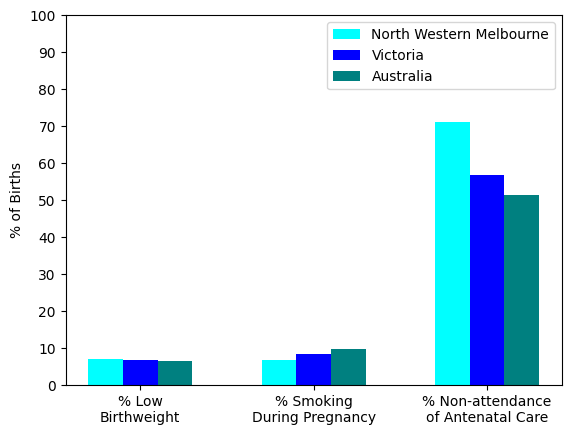

In [6]:
#figure 1 generation
#parsing plot data to list
MC_y1 = MC_rates['North Western Melbourne'].tolist()
MC_y2 = MC_rates['Victoria'].tolist()
MC_y3 = MC_rates['AUSTRALIA+'].tolist()

#plot parameters
MC_x = np.arange(3)
MC_width = 0.2
#drawing plot
plt.bar(MC_x-0.2, MC_y1, MC_width, color= NWM_colour) 
plt.bar(MC_x, MC_y2, MC_width, color= VIC_colour) 
plt.bar(MC_x+0.2, MC_y3, MC_width, color= AUS_colour) 
plt.ylim((0,100))
plt.yticks(np.arange(0,101,10))
plt.xticks(MC_x, ['% Low\nBirthweight','% Smoking\nDuring Pregnancy', '% Non-attendance\nof Antenatal Care']) 
plt.ylabel('% of Births') 
plt.legend(["North Western Melbourne", "Victoria", "Australia"]) 
plt.show() 

In [7]:
MC_LGA = mother_child_raw[mother_child_raw['LGA_code'].isin(NWM_LGA)]
MC_LGA = MC_LGA.drop([604,144])
MC_LGA = MC_LGA.filter(items= ['LGA_name','% Women who did not attend antenatal care within the first 10 weeks'])
MC_LGA = MC_LGA.rename(columns= {'% Women who did not attend antenatal care within the first 10 weeks':'% non-attendance of antenatal care'})

MC_LGA

,LGA_name,% non-attendance of antenatal care
145,Brimbank (C),83.852786
146,Darebin (C),74.394818
147,Hobsons Bay (C),69.00844
148,Hume (C),56.163836
149,Macedon Ranges (S) - part a,64.784513
150,Maribyrnong (C),69.025667
151,Melbourne (C),65.991629
152,Melton (C),80.082124
153,Moonee Valley (C),61.193759
154,Moorabool (S) - part a,60.717514


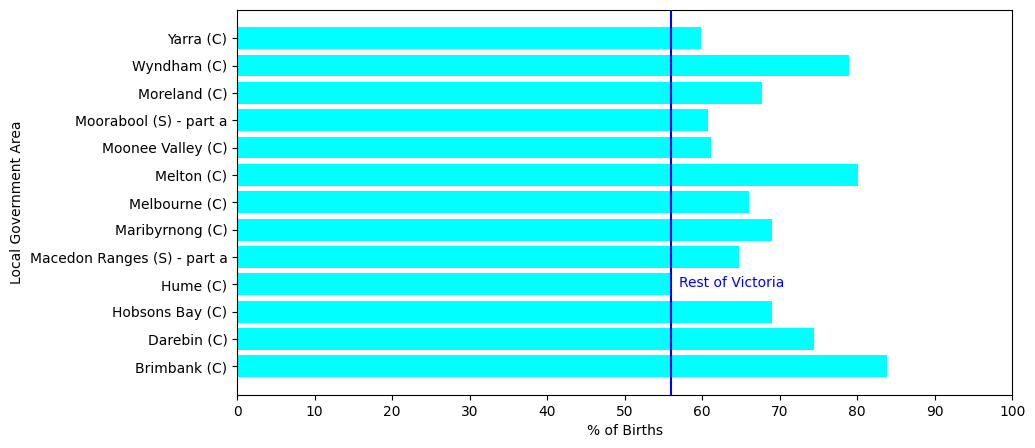

In [8]:
#Figure 2 generation
# horizontal bar plot for % non-attendance
fig2 = plt.figure(figsize=(10,5)) # change figure size
plt.barh(
    MC_LGA['LGA_name'],
    MC_LGA['% non-attendance of antenatal care'],
    color = NWM_colour
    )
plt.xlim(0,100)
plt.xticks(np.arange(0,101,10)) #adjust tick marks
plt.xlabel('% of Births')
plt.ylabel('Local Government Area')
plt.axvline(x=56, color= VIC_colour)
plt.text(57,2.9,'Rest of Victoria', color= VIC_colour)
plt.show()

In [9]:
#family factors
housing_raw = pd.read_excel('Data/housing_data.xlsx')
housing_data = housing_raw[housing_raw['LGA_name'].isin(['North Western Melbourne', 'Victoria','AUSTRALIA+'])]
#crowded homes data
crowded_col = ['LGA_name','% families with children aged less than 15 years living in crowded dwellings','% Single parent families with children living in crowded dwellings, as a proportion of total Single parent families with children']
crowded_data = housing_data.filter(items= crowded_col)
crowded_data.columns = ['LGA_name','% families', '% single parent families']
crowded_data = crowded_data.drop([604])

crowded_data

,LGA_name,% families,% single parent families
144,North Western Melbourne,11.279245,19.787479
627,AUSTRALIA+,8.557538,14.718988
641,Victoria,8.012289,14.33991


outside is percentage owned or renting or other
['Families with children aged less than 15 years living in owned dwellings','Single parent families with children living in owned dwellings',
'Families with children aged less than 15 years living in rented dwellings', 'Single parent families with children living in rented dwellings',
'Families with children aged less than 15 years living in dwellings rented from state or territory housing authority','Single parent families with children living in dwellings rented from state or territory housing authority',
'Families with children aged less than 15 years living in dwellings rented from a housing co-operative, community, or church group','Single parent families with children living in dwellings rented from a housing co-operative, community, or church group',
'Families with children aged less than 15 years living in social housing','Single parent families with children living in social housing',
'Total families with children aged less than 15 years','Total Single parent families with children']

In [10]:
housing_cols = ['Families with children aged less than 15 years living in owned dwellings','Single parent families with children living in owned dwellings',
'Families with children aged less than 15 years living in rented dwellings', 'Single parent families with children living in rented dwellings',
'Families with children aged less than 15 years living in dwellings rented from state or territory housing authority','Single parent families with children living in dwellings rented from state or territory housing authority',
'Families with children aged less than 15 years living in dwellings rented from a housing co-operative, community, or church group','Single parent families with children living in dwellings rented from a housing co-operative, community, or church group',
'Families with children aged less than 15 years living in social housing','Single parent families with children living in social housing']

housing_NWM = housing_raw[housing_raw['LGA_code'] == 'PHN201']
housing_NWM = housing_NWM.drop([604])
housing_NWM = housing_NWM.filter(items=housing_cols)

housing_NWM

,Families with children aged less than 15 years living in owned dwellings,Single parent families with children living in owned dwellings,Families with children aged less than 15 years living in rented dwellings,Single parent families with children living in rented dwellings,Families with children aged less than 15 years living in dwellings rented from state or territory housing authority,Single parent families with children living in dwellings rented from state or territory housing authority,"Families with children aged less than 15 years living in dwellings rented from a housing co-operative, community, or church group","Single parent families with children living in dwellings rented from a housing co-operative, community, or church group",Families with children aged less than 15 years living in social housing,Single parent families with children living in social housing
144,106879,12628,51596,14975,4145,2667,451,263,4596,2930


In [11]:
#single parent families
housing_NWM_1_parent = housing_NWM[housing_NWM.columns[1::2]]

housing_NWM_1_parent.columns = ['Owned', 'Total Renting','Renting from housing authority',
                          'Renting from a housing co-operative, community, or church group',
                          'Living in social housing']
housing_NWM_1_parent['Private Renting'] = housing_NWM_1_parent['Total Renting'] - (housing_NWM_1_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_1_parent['Renting from housing authority'])
housing_NWM_1_parent = housing_NWM_1_parent.drop(columns=['Total Renting'])
housing_NWM_1_parent = housing_NWM_1_parent.T


housing_NWM_1_parent['Family'] = ['Single Parent' ,'Single Parent', 'Single Parent','Single Parent','Single Parent']
housing_NWM_1_parent['Housing'] = housing_NWM_1_parent.index

housing_NWM_1_parent = housing_NWM_1_parent.reset_index(drop= True)

housing_NWM_1_parent = housing_NWM_1_parent[['Housing','Family', 144]]
housing_NWM_1_parent

C:\Users\antho\AppData\Local\Temp\ipykernel_25096\1893202609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_NWM_1_parent['Private Renting'] = housing_NWM_1_parent['Total Renting'] - (housing_NWM_1_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_1_parent['Renting from housing authority'])


,Housing,Family,144
0,Owned,Single Parent,12628
1,Renting from housing authority,Single Parent,2667
2,"Renting from a housing co-operative, community...",Single Parent,263
3,Living in social housing,Single Parent,2930
4,Private Renting,Single Parent,12045


In [12]:
#2 parent families
housing_NWM_2_parent = housing_NWM[housing_NWM.columns[::2]]

housing_NWM_2_parent.columns = ['Owned', 'Total Renting','Renting from housing authority',
                          'Renting from a housing co-operative, community, or church group',
                          'Living in social housing']
housing_NWM_2_parent['Private Renting'] = housing_NWM_2_parent['Total Renting'] - (housing_NWM_2_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_2_parent['Renting from housing authority'])
housing_NWM_2_parent = housing_NWM_2_parent.drop(columns= ['Total Renting'])
housing_NWM_2_parent = housing_NWM_2_parent.T


housing_NWM_2_parent['Family'] = ['2 Parent' ,'2 Parent', '2 Parent','2 Parent','2 Parent']
housing_NWM_2_parent['Housing'] = housing_NWM_2_parent.index

housing_NWM_2_parent = housing_NWM_2_parent.reset_index(drop= True)

housing_NWM_2_parent = housing_NWM_2_parent[['Housing','Family', 144]]
housing_NWM_2_parent

C:\Users\antho\AppData\Local\Temp\ipykernel_25096\542434690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_NWM_2_parent['Private Renting'] = housing_NWM_2_parent['Total Renting'] - (housing_NWM_2_parent['Renting from a housing co-operative, community, or church group'] + housing_NWM_2_parent['Renting from housing authority'])


,Housing,Family,144
0,Owned,2 Parent,106879
1,Renting from housing authority,2 Parent,4145
2,"Renting from a housing co-operative, community...",2 Parent,451
3,Living in social housing,2 Parent,4596
4,Private Renting,2 Parent,47000


In [13]:
housing_NWM_family = pd.concat([housing_NWM_1_parent, housing_NWM_2_parent])

housing_NWM_family

,Housing,Family,144
0,Owned,Single Parent,12628
1,Renting from housing authority,Single Parent,2667
2,"Renting from a housing co-operative, community...",Single Parent,263
3,Living in social housing,Single Parent,2930
4,Private Renting,Single Parent,12045
0,Owned,2 Parent,106879
1,Renting from housing authority,2 Parent,4145
2,"Renting from a housing co-operative, community...",2 Parent,451
3,Living in social housing,2 Parent,4596
4,Private Renting,2 Parent,47000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


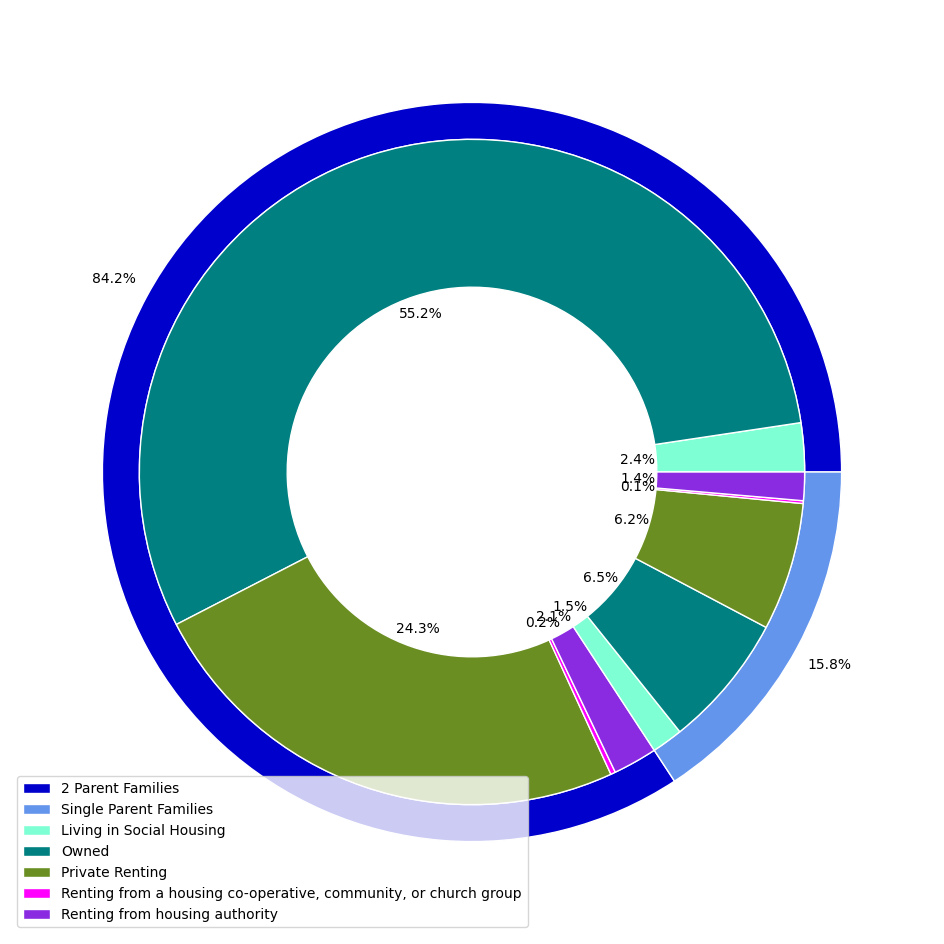

In [14]:
#Figure 3 generation
outer= housing_NWM_family.groupby('Family').sum() # outer donut data
inner = housing_NWM_family.groupby(['Family','Housing']).sum() #inner donut data

#figure parameters
fig3, ax1 = plt.subplots(figsize = (24,12))
outer_size = 0.1
inner_size = 0.4

#outer donut generation
ax1.pie(outer.values.flatten()[1::2], radius=1, 
       autopct='%1.1f%%',
       pctdistance= 1.1,
       wedgeprops=dict(width=outer_size, edgecolor='w'),
       colors = ['mediumblue', 'cornflowerblue'])

#inner donut generation
ax1.pie(inner.values.flatten(), radius=1-outer_size, 
       autopct='%1.1f%%',
       pctdistance= 0.5,
       wedgeprops=dict(width=inner_size, edgecolor='w'),
       colors = ['aquamarine', 'teal','olivedrab', 'magenta','blueviolet'])

# force legend 
legend = ['2 Parent Families', 'Single Parent Families', 'Living in Social Housing','Owned','Private Renting',
          'Renting from a housing co-operative, community, or church group','Renting from housing authority']
plt.legend()
plt.legend(loc= 'lower left', labels= legend)          

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


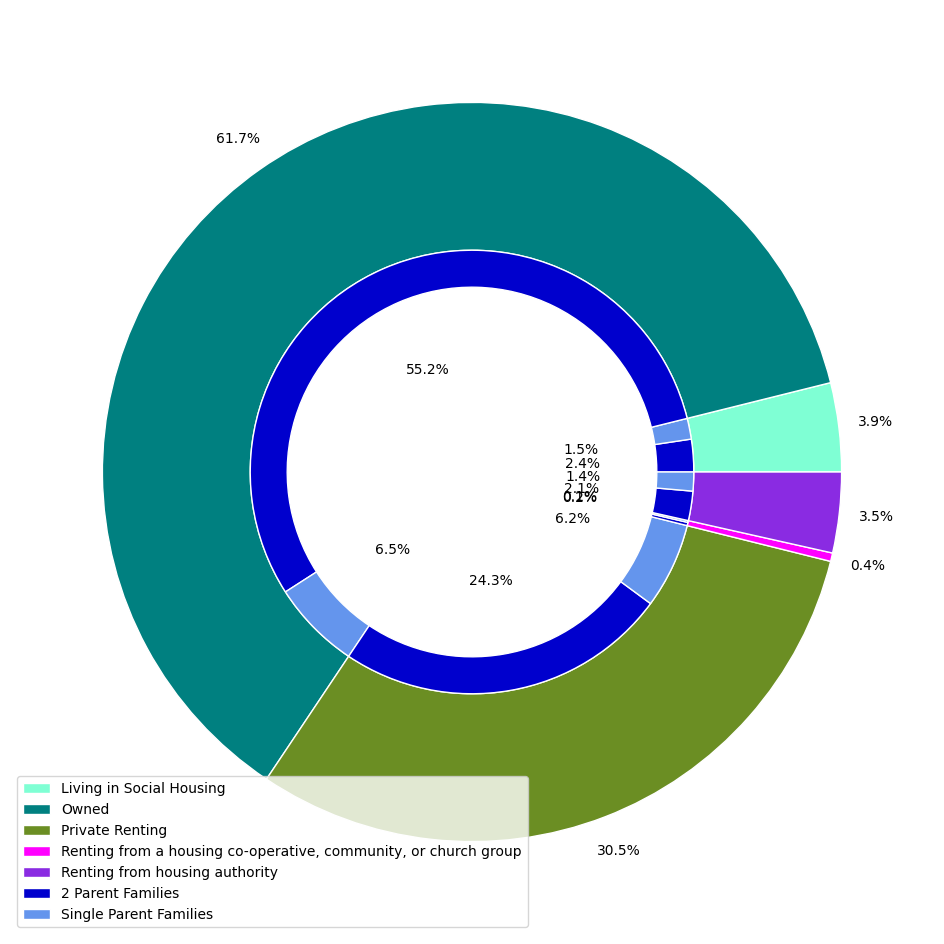

In [23]:
outer1= housing_NWM_family.groupby('Housing').sum() # outer donut data
inner1 = housing_NWM_family.groupby(['Housing','Family']).sum() #inner donut data

#figure parameters
fig01, ax2 = plt.subplots(figsize = (24,12))
outer_size = 0.4
inner_size = 0.1

#outer donut generation
ax2.pie(outer1.values.flatten()[1::2], radius=1, 
       autopct='%1.1f%%',
       pctdistance= 1.1,
       wedgeprops=dict(width=outer_size, edgecolor='w'),
       colors = ['aquamarine', 'teal','olivedrab', 'magenta','blueviolet'])

#inner donut generation
ax2.pie(inner1.values.flatten(), radius=1-outer_size, 
       autopct='%1.1f%%',
       pctdistance= 0.5,
       wedgeprops=dict(width=inner_size, edgecolor='w'),
       colors = ['mediumblue', 'cornflowerblue'])

# force legend 
legend = ['Living in Social Housing','Owned','Private Renting','Renting from a housing co-operative, community, or church group',
          'Renting from housing authority', '2 Parent Families', 'Single Parent Families']
plt.legend()
plt.legend(loc= 'lower left', labels= legend)          

plt.show()

In [15]:
# Family data
family_raw = pd.read_excel('Data/family_data.xlsx')
family_data = family_raw[family_raw['LGA_code'].isin(NWM_LGA)]
family_data = family_data.filter(items= ['LGA_name','Jobless families with children under 15 years','Total families with children under 15 years', '% jobless families'])
family_data = family_data.drop([604])

family_data

,LGA_name,Jobless families with children under 15 years,Total families with children under 15 years,% jobless families
144,North Western Melbourne,20606,161873,12.729811
145,Brimbank (C),3722,19915,18.684739
146,Darebin (C),1451,13386,10.837254
147,Hobsons Bay (C),839,9136,9.18144
148,Hume (C),4170,22804,18.292683
149,Macedon Ranges (S) - part a,168.161623,3106.497159,5.414342
150,Maribyrnong (C),812,7714,10.531777
151,Melbourne (C),724,5331,13.580942
152,Melton (C),2288,17411,13.138099
153,Moonee Valley (C),854,10946,7.799799


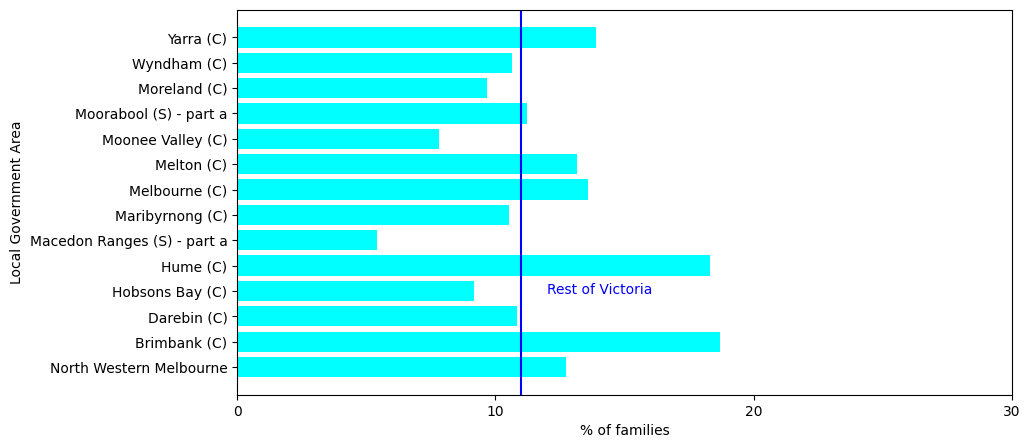

In [16]:
# figure 4 generation
fig4 = plt.figure(figsize=(10,5)) # change figure size
plt.barh(
    family_data['LGA_name'],
    family_data['% jobless families'],
    color = NWM_colour
    )
plt.xlim(0,30)
plt.xticks(np.arange(0,31,10)) #adjust tick marks
plt.xlabel('% of families')
plt.ylabel('Local Government Area')
plt.axvline(x=11, color = VIC_colour)
plt.text(12,2.9,'Rest of Victoria', color = VIC_colour)
plt.show()

In [17]:
AEDC_raw = pd.read_excel('Data/AEDC_data.xlsx')
AEDC_percent = AEDC_raw.loc[:, AEDC_raw.columns.str.contains('% Children developmentally vulnerable|LGA')]

# assess PHN total
AEDC_LGA = AEDC_percent[AEDC_percent['LGA_code'].isin(NWM_LGA)]
AEDC_LGA = AEDC_LGA.drop(columns = 'LGA_code')
AEDC_LGA = AEDC_LGA.drop([604])

AEDC_LGA.columns = [w.replace("% Children developmentally vulnerable on " , "") for w in AEDC_LGA.columns]
AEDC_LGA.columns = [w.replace("% Children developmentally vulnerable in " , "") for w in AEDC_LGA.columns]
AEDC_LGA


,LGA_name,one or more domains,two or more domains,physical domain,social domain,emotional domain,language and cognitive domain,communication domain
144,North Western Melbourne,21.843513,11.130861,8.646003,9.860911,8.162773,7.401363,9.167666
145,Brimbank (C),26.195426,13.181818,9.286009,11.184482,8.204915,9.82659,12.634187
146,Darebin (C),17.374517,8.312183,6.586447,6.71311,6.829897,5.136335,6.71311
147,Hobsons Bay (C),19.461883,10.842294,10.215054,8.594449,6.726457,6.72043,7.706093
148,Hume (C),28.948215,16.410749,12.95469,13.433312,11.254434,11.548305,13.66539
149,Macedon Ranges (S) - part a,16.144201,6.426332,6.896552,6.739812,7.053292,3.291536,3.605016
150,Maribyrnong (C),16.469322,6.84492,5.567452,7.15812,6.55914,3.315508,6.944444
151,Melbourne (C),20.847458,9.830508,7.457627,9.152542,8.135593,5.084746,11.016949
152,Melton (C),20.546218,10.058676,7.949791,9.208874,7.61464,7.531381,6.78108
153,Moonee Valley (C),14.868106,7.034373,4.71246,7.428115,6.32,3.597122,4.792332


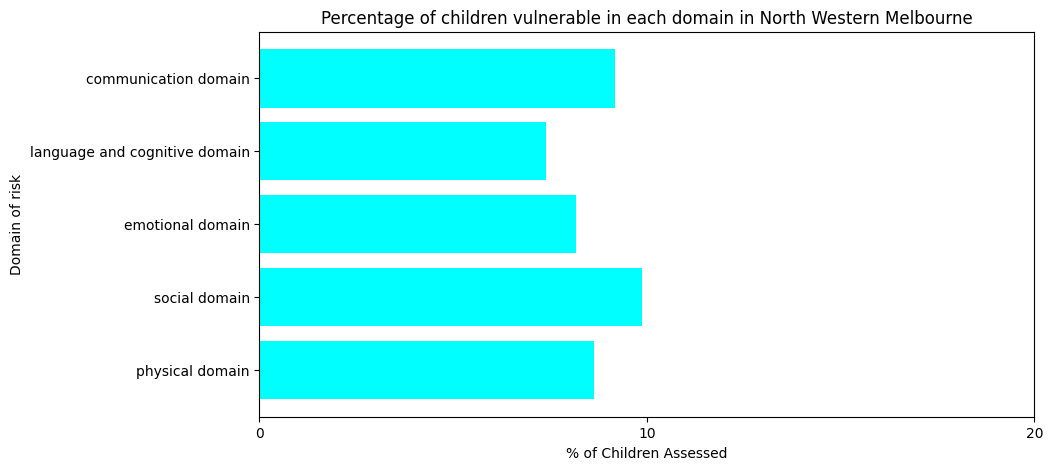

In [18]:
# Figure 5a generation
AEDC_NWM = AEDC_LGA[AEDC_LGA['LGA_name']== 'North Western Melbourne']

AEDC_NWM = AEDC_NWM.drop(columns= ['LGA_name','one or more domains', 'two or more domains']).T

AEDC_NWM
fig5a = plt.figure(figsize=(10,5)) # change figure size
plt.barh(
    AEDC_NWM.index,
    AEDC_NWM[144],
    color = NWM_colour
    )
plt.xlim(0,20)
plt.xticks(np.arange(0,21,10)) #adjust tick marks
plt.xlabel('% of Children Assessed')
plt.ylabel('Domain of risk')
plt.title('Percentage of children vulnerable in each domain in North Western Melbourne')
plt.show()

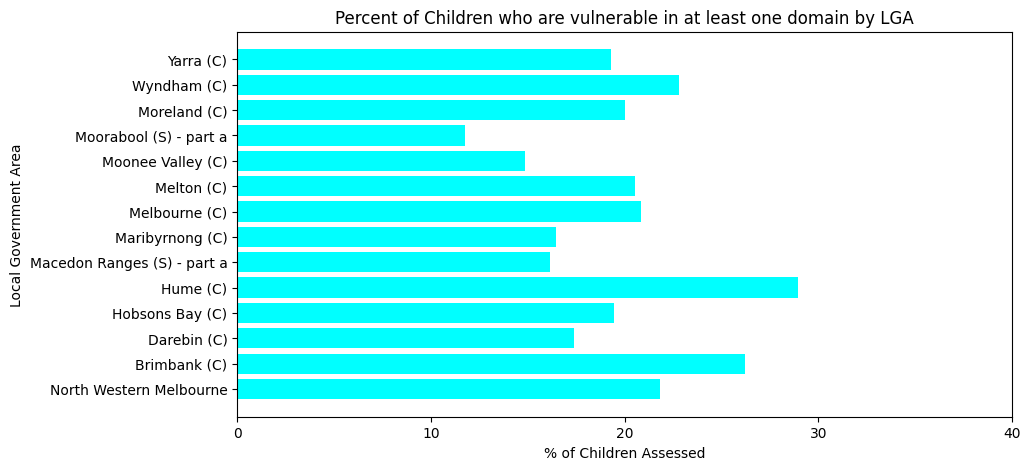

In [19]:
#Figure 5b generation
fig5b = plt.figure(figsize=(10,5)) # change figure size
plt.barh(
    AEDC_LGA['LGA_name'],
    AEDC_LGA['one or more domains'],
    color = NWM_colour
    )
plt.xlim(0,40)
plt.xticks(np.arange(0,41,10)) #adjust tick marks
plt.xlabel('% of Children Assessed')
plt.ylabel('Local Government Area')
plt.title('Percent of Children who are vulnerable in at least one domain by LGA')
plt.show()